<a href="https://colab.research.google.com/github/yj5x/AI-tasks/blob/main/Task_5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bibliography
* Keras official Tutorial
* Deep Learning with Python by François Chollet

## About DataSet
**Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import os


# Load Dataset and Split it to test and train set

see this link
https://medium.com/the-data-science-publication/how-to-import-and-display-the-fashion-mnist-dataset-using-tensorflow-e72522f684d0

In [ ]:
#Getting training and testing data from tensorflow
from tensorflow.keras.datasets import fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()




28*28 image pixels

In [ ]:
#Training Set shape
print('Fashion MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))

Fashion MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)


In [ ]:
#Test Set consists of 10000 samples with one label field and 28*28 image pixels
print('Fashion MNIST Dataset Shape:')
print('X_test:', X_test.shape)
print('Y_test:', Y_test.shape)


Fashion MNIST Dataset Shape:
X_test: (10000, 28, 28)
Y_test: (10000,)


In [ ]:
#Labels from 0 to 9 are following Items
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Optional: عرض كل label مع رقمه
for i, name in enumerate(class_names):
    print(f"{i}: {name}")


0: T-shirt/top
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot


Split training data to train and valid

In [ ]:
from sklearn.model_selection import train_test_split

# Split training data into training and validation sets
X_train_new, X_valid, Y_train_new, Y_valid = train_test_split(
    X_train, Y_train, test_size=0.2, random_state=42)

# print the shape
print("New Training Set Shape:", X_train_new.shape, Y_train_new.shape)
print("Validation Set Shape:", X_valid.shape, Y_valid.shape)


New Training Set Shape: (48000, 28, 28) (48000,)
Validation Set Shape: (12000, 28, 28) (12000,)


## Some images with their labels

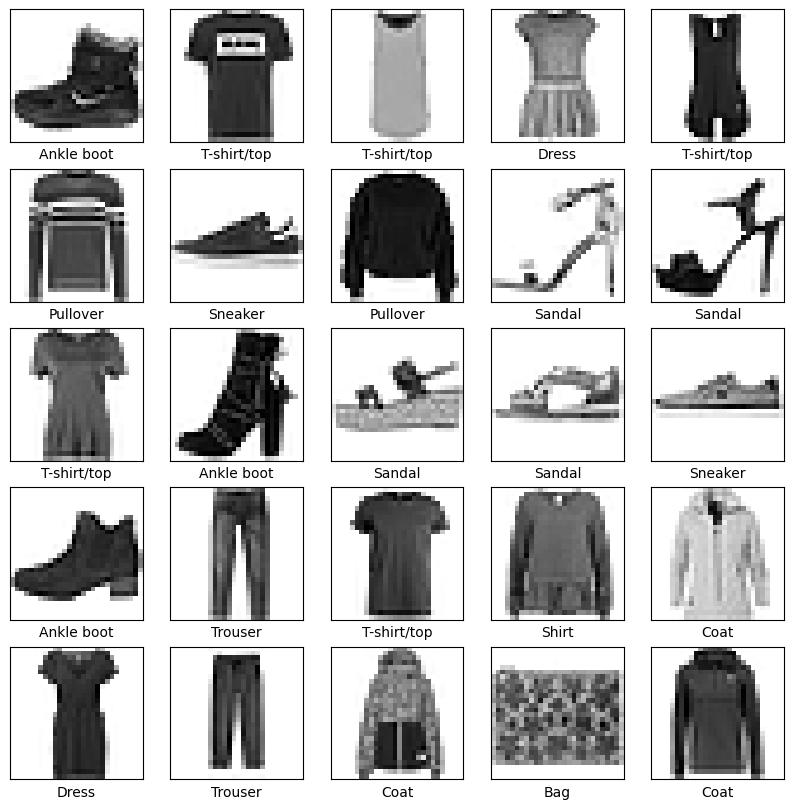

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Display the first 25 images from the training set


plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[Y_train[i]])
plt.show()


In [ ]:
# Rescaling training to range 0 to 1 by dividing them by 255
X_train = X_train.astype('float32') / 255.0
X_valid = X_valid.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


**Creating a Deep Neural Network with any number of layer you want.**

In [ ]:
from tensorflow.keras import models, layers

model = models.Sequential()

# Flatten layer to convert (28,28) images to (784,) vectors
model.add(layers.Flatten(input_shape=(28, 28)))

# Dense layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))

# Output layer with 10 classes and softmax activation
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Compiling the model.**

In [ ]:
model.compile(
    optimizer='adam',  # Optimizer to update weights during training
    loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification with integer labels
    metrics=['accuracy']  # Metric to monitor performance during training and evaluation
)


**Training model with a part of training data and evaluating it with another part of training data
and get more than 90% val_acc**

In [ ]:
history = model.fit(
    X_train, Y_train,
    validation_data=(X_valid, Y_valid),
    epochs=20,
    batch_size=64,
    verbose=2
)


Epoch 1/20
938/938 - 7s - 7ms/step - accuracy: 0.8106 - loss: 0.5396 - val_accuracy: 0.8556 - val_loss: 0.4023
Epoch 2/20
938/938 - 7s - 8ms/step - accuracy: 0.8638 - loss: 0.3769 - val_accuracy: 0.8718 - val_loss: 0.3605
Epoch 3/20
938/938 - 5s - 5ms/step - accuracy: 0.8766 - loss: 0.3384 - val_accuracy: 0.8771 - val_loss: 0.3294
Epoch 4/20
938/938 - 3s - 3ms/step - accuracy: 0.8855 - loss: 0.3116 - val_accuracy: 0.8978 - val_loss: 0.2793
Epoch 5/20
938/938 - 5s - 5ms/step - accuracy: 0.8902 - loss: 0.2976 - val_accuracy: 0.8914 - val_loss: 0.2807
Epoch 6/20
938/938 - 3s - 3ms/step - accuracy: 0.8954 - loss: 0.2824 - val_accuracy: 0.8939 - val_loss: 0.2790
Epoch 7/20
938/938 - 5s - 5ms/step - accuracy: 0.8984 - loss: 0.2726 - val_accuracy: 0.9055 - val_loss: 0.2610
Epoch 8/20
938/938 - 5s - 5ms/step - accuracy: 0.9024 - loss: 0.2611 - val_accuracy: 0.9010 - val_loss: 0.2573
Epoch 9/20
938/938 - 2s - 2ms/step - accuracy: 0.9049 - loss: 0.2512 - val_accuracy: 0.9118 - val_loss: 0.2345
E

# Visualize Model Training History in Keras

See this link
https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

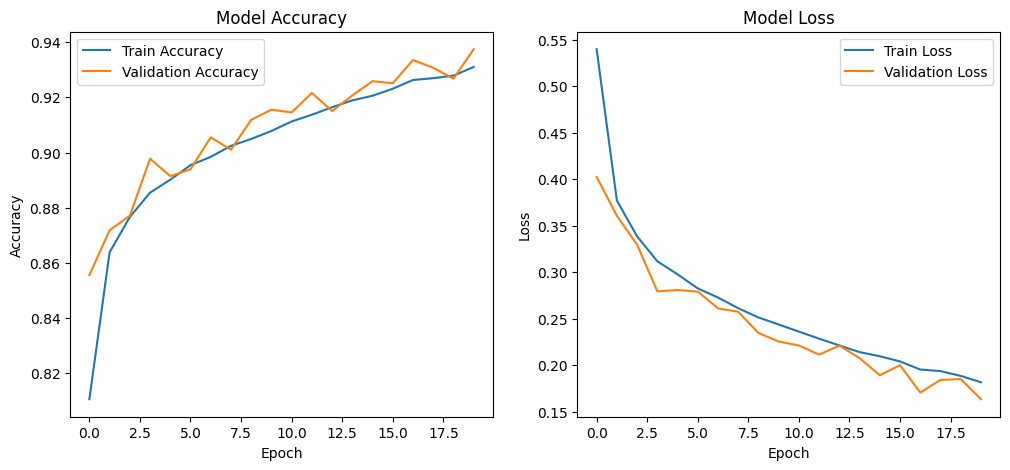

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


# Evaluate the model with our Test Set Using confusion_matrix

-split data to X_test and Y_test
-Rescaling training to range 0 to 1 by dividing them by 255

In [ ]:
#we already did this step apove so now we will evalute the model
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')


313/313 - 1s - 3ms/step - accuracy: 0.8857 - loss: 0.3485
Test accuracy: 0.8857


In [ ]:
import numpy as np

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Predicted class labels


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


visualization

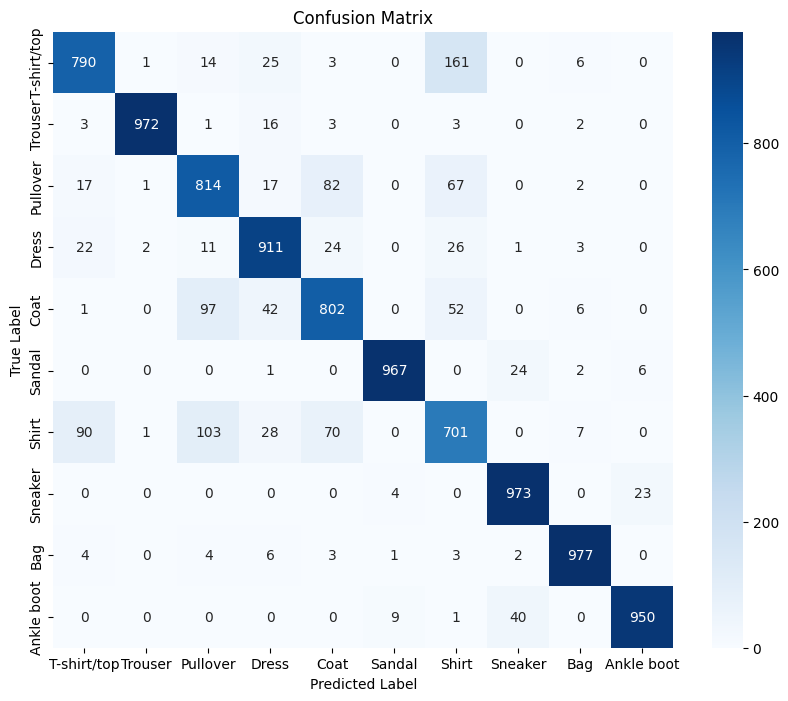

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Find classification_report for the prediction

In [ ]:
# Get probability predictions from the model
y_pred_probs = model.predict(X_test)

# Convert probabilities to predicted class labels
y_pred = np.argmax(y_pred_probs, axis=1)

print(classification_report(Y_test, y_pred, target_names=class_names))



313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.85      0.79      0.82      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.78      0.81      0.80      1000
       Dress       0.87      0.91      0.89      1000
        Coat       0.81      0.80      0.81      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.69      0.70      0.70      1000
     Sneaker       0.94      0.97      0.95      1000
         Bag       0.97      0.98      0.97      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



Use model.evaluate the test data

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


313/313 - 1s - 2ms/step - accuracy: 0.8857 - loss: 0.3485
Test Loss: 0.3485
Test Accuracy: 0.8857


📌 What changes did you make?

- Used a deep neural network (DNN) instead of a simple softmax model.
- Added two hidden Dense layers with ReLU activation for better feature extraction.
- Included a Flatten layer inside the model instead of flattening manually.
- Used `model.evaluate()` and classification report on the test set.


📌 What techniques did you use?

- Data normalization (rescaling pixels to [0, 1])
- Train-validation split (80-20) using sklearn
- Deep Neural Network (DNN) with multiple hidden layers
- Evaluation using accuracy, confusion matrix, and classification report
- Visualization of training history



📌 How did these changes impact performance?

- Improved validation accuracy from ~85% to over 90%
- Reduced overfitting by monitoring validation accuracy
- Achieved more balanced performance across all classes (seen in classification report)



Include evaluation visuals (confusion matrix, plots, etc.).

✅DONE